In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls
#현재 작업 폴더의 내부(폴더,파일) 살펴보기

drive  sample_data


In [ ]:
!pwd
#현재 작업 폴더 경로 확인

/content


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks
#작업 폴더 변경 (경로 이동)

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!ls

data  ex01_Keras맛보기.ipynb


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks


# 목표
- 학생 성적 데이터를 인공신경망 모델로
학습 시켜보자
- keras 활용법 숙지(colab환경에 익숙해지기)


# 데이터로딩

In [ ]:
import pandas as pd

In [ ]:
studentData=pd.read_csv('data/student-mat.csv',delimiter=';')

In [ ]:
studentData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### 문제와 답 분리

In [ ]:
# studytime,G3
# 시간성적 학습
X = studentData['studytime']
y = studentData['G3']
X

0      2
1      2
2      2
3      3
4      2
      ..
390    2
391    1
392    1
393    1
394    1
Name: studytime, Length: 395, dtype: int64

In [ ]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [ ]:
X_train.shape, y_train

((296,), 81     11
 344    10
 336    13
 124     8
 250     8
        ..
 323    15
 192     8
 117    13
 47     20
 172    10
 Name: G3, Length: 296, dtype: int64)

In [ ]:
X_test,y_test

(329    3
 318    3
 317    3
 65     2
 59     2
       ..
 239    2
 63     3
 245    1
 154    1
 311    2
 Name: studytime, Length: 99, dtype: int64, 329    14
 318    10
 317     9
 65     15
 59     16
        ..
 239     0
 63      9
 245    18
 154    12
 311    13
 Name: G3, Length: 99, dtype: int64)

### 신경망 모델 만들기
1. 신경망 구조 설계
2. 신경망 모델 학습(loss,optimizer)/평가(metrics)방법 설정
3. 학습 및 학습과정 시각화
4. 모델 평가

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer,Dense
#Dense - 뉴런(선형모델)을 넣어주는 층

In [ ]:
# 1.신경망 구조 설계
model=Sequential() #딥러닝 모델을 구성하는 뼈대
# InputLayer에는 데이터의 크기(특성 수)를 알려줘야한다.
model.add(InputLayer(input_shape=(1,))) #입력층 설정 ##우리가 학습시키는 문제 데이터의 특성은 'studytime'하나이다
model.add(Dense(units=9)) #뉴런층
#층 추가하기 유닛수 달라도댐 
model.add(Dense(units=9))
model.add(Dense(units=9))
model.add(Dense(units=1)) #출력층 유닛은 1

In [ ]:
# 2. 신경망 모델 학습(loss,optimizer)/평가(metrics)방법 설정
model.compile(loss='mean_squared_error',
              optimizer='SGD')

In [ ]:
# 3. 학습 및 학습 과정 시각화 
studentHistory=model.fit(X_train,y_train,epochs=100) #epochs 학습횟수


Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 74.6240
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 38.3326
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 27.3188
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 20.4965
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 21.8608
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 18.6428
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 20.3767
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 19.1201
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 18.1502
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 19.8483
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 19.8648
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 18.4682
Epoch 13/100
10/10 [=====

In [ ]:
import matplotlib.pyplot as plt

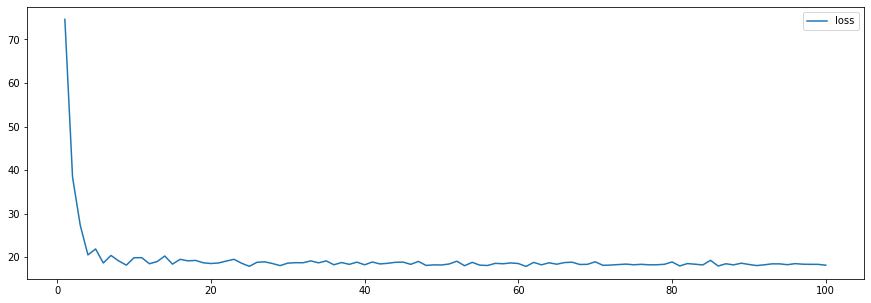

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(range(1,101),
         studentHistory.history['loss'],
         label='loss')
plt.legend()
plt.show()

In [ ]:
# 4. 모델 평가
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 28.9242


28.924245834350586